### Exercise01

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Homework2_datasets/diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


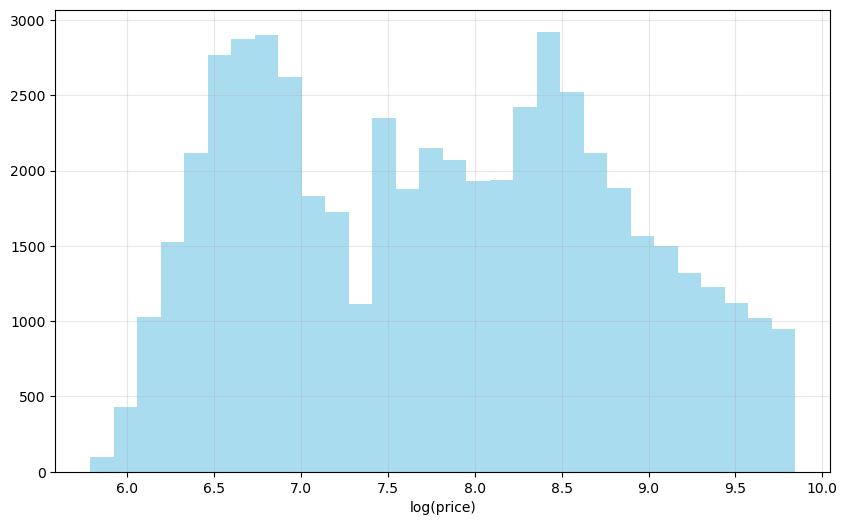

In [3]:
plt.figure(figsize=(10, 6))
plt.hist(np.log(df['price']), bins=30, color='skyblue', alpha=0.7)
plt.xlabel('log(price)')
plt.grid(True, alpha=0.3)
plt.show()

In [4]:
cut_counts = df['cut'].value_counts()

bars = plt.bar(cut_counts.index, cut_counts.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

In [5]:
plt.figure(figsize=(10, 6))
plt.xlabel('Cut')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

In [6]:
pivot_table = df.pivot_table(
    values='price',
    index='cut',
    columns='color',
    aggfunc='count'
).reindex(index=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'])

<Figure size 1200x600 with 0 Axes>

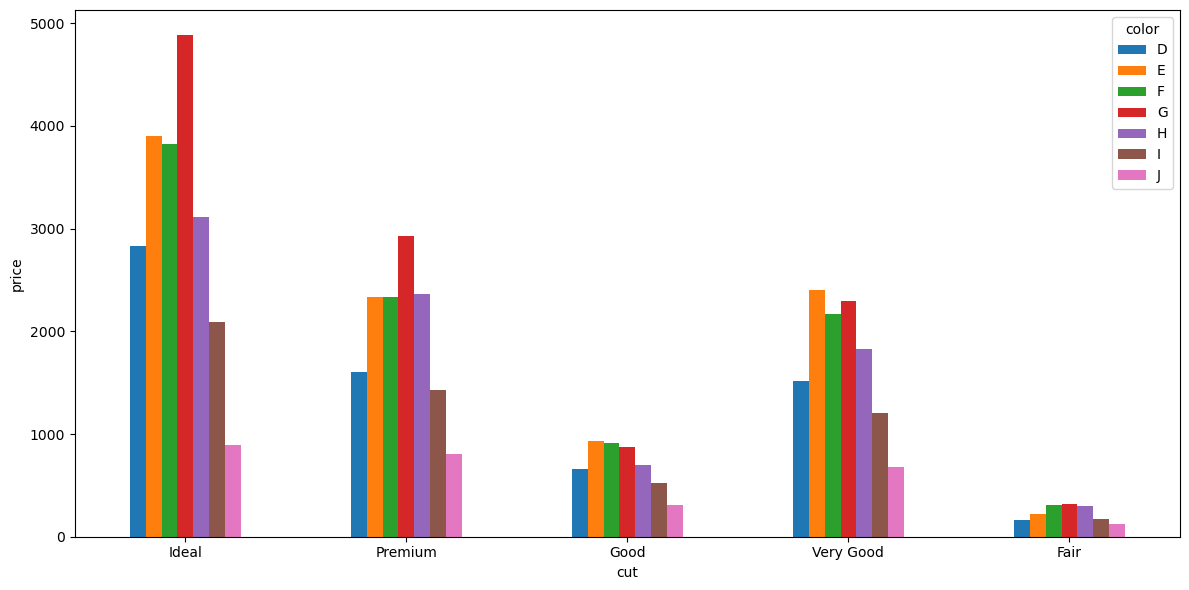

In [8]:
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', figsize=(12, 6))
plt.xlabel('cut')
plt.xticks(rotation=0)
plt.ylabel('price')
plt.legend(title='color', loc='upper right')
plt.tight_layout()
plt.show()

### Exercise02

In [9]:
df = pd.read_csv("Homework2_datasets/mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


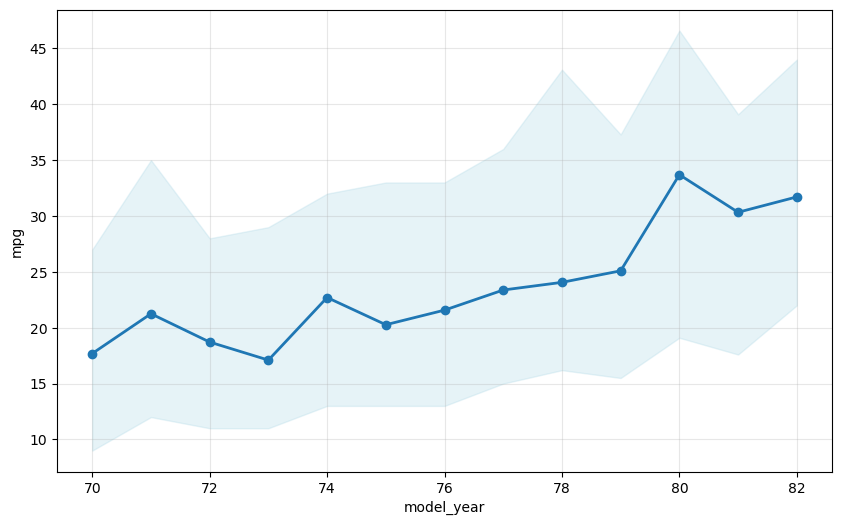

In [18]:
#线图
mi_mean = df.groupby('model_year')['mpg'].mean()
mi_max = df.groupby('model_year')['mpg'].max()
mi_min = df.groupby('model_year')['mpg'].min()

plt.figure(figsize=(10, 6))
plt.fill_between(mi_mean.index, mi_min.values, mi_max.values, alpha=0.3, color='lightblue')
plt.plot(mi_mean.index, mi_mean.values, marker='o', linewidth=2)
plt.xlabel('model_year')
plt.ylabel('mpg')
plt.grid(True, alpha=0.3)
plt.show()

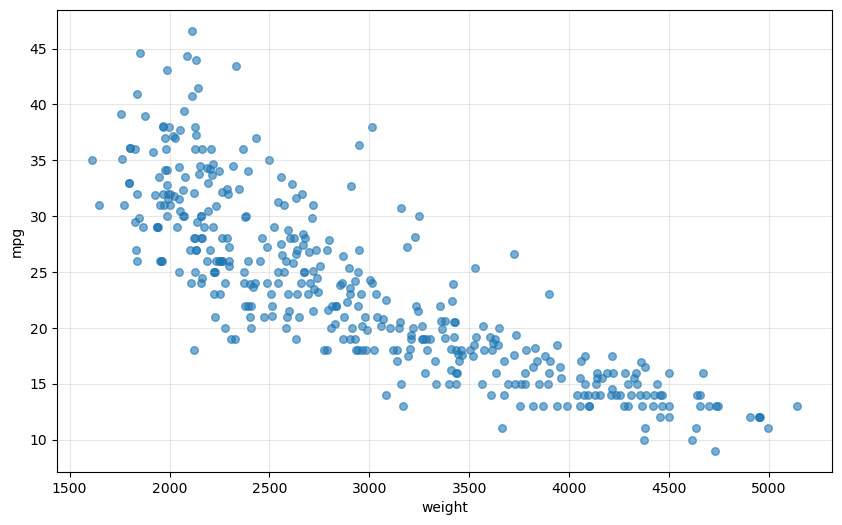

In [19]:
#散点图
plt.figure(figsize=(10, 6))
plt.scatter(df['weight'], df['mpg'], alpha=0.6, s=30)
plt.xlabel('weight')
plt.ylabel('mpg')
plt.grid(True, alpha=0.3)
plt.show()

<Figure size 1000x600 with 0 Axes>

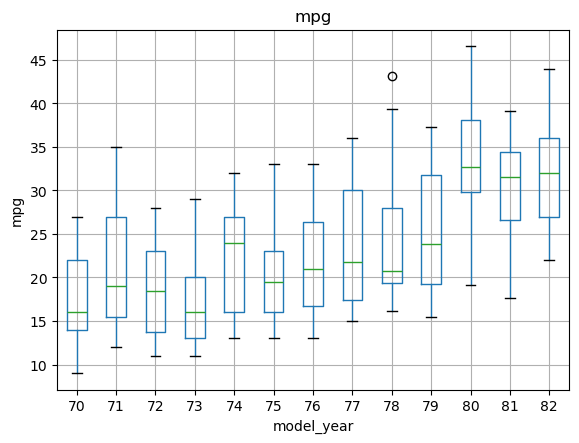

In [22]:
#箱线图
plt.figure(figsize=(10, 6))
df.boxplot(column='mpg', by='model_year')
plt.xlabel('model_year')
plt.ylabel('mpg')
plt.suptitle('')
plt.show()

### Exercise03

In [23]:
df_google = pd.read_csv("Homework2_datasets/google_stock.csv")
df_microsoft = pd.read_csv("Homework2_datasets/microsoft_stock.csv")

df_google.head()
df_microsoft.head()

,Unnamed: 0,date,open,high,low,close,volume,adj_close
0,0,2000-03-01,89.62,94.09,88.94,90.81,106889800,33.68
1,1,2000-03-02,91.81,95.37,91.12,93.37,106932600,34.63
2,2,2000-03-03,94.75,98.87,93.87,96.12,101435200,35.65
3,3,2000-03-06,96.00,97.37,90.12,90.62,93609400,33.61
4,4,2000-03-07,96.12,97.50,91.94,92.87,135061000,34.45


In [24]:
df_google['date'] = pd.to_datetime(df_google['date'])
df_microsoft['date'] = pd.to_datetime(df_microsoft['date'])

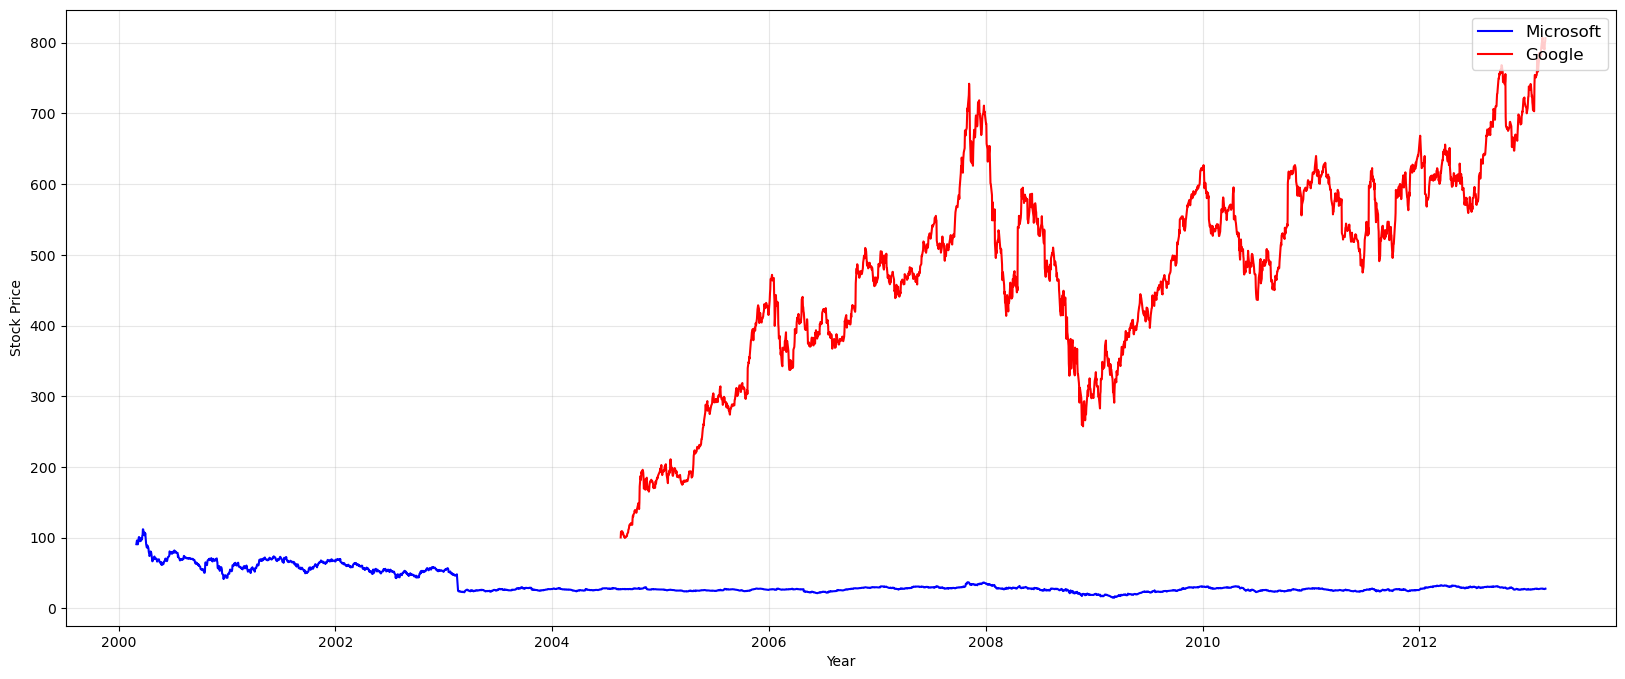

In [28]:
plt.figure(figsize=(20, 8))

plt.plot(df_microsoft['date'], df_microsoft['close'], label='Microsoft', linewidth=1.5, color='blue')
plt.plot(df_google['date'], df_google['close'], label='Google', linewidth=1.5, color='red')

plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()